### 1. Setting Up
- Import libraries
- Load data
- One-hot encoding

In [1]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras.datasets import cifar10
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time


(images_train, labels_train), (images_test, labels_test) = cifar10.load_data()
images_train = images_train.astype('float32')
images_test = images_test.astype('float32')

# normalize the data
mean = np.mean(images_train,axis=(0,1,2,3))
sd = np.std(images_train,axis=(0,1,2,3))
images_train = (images_train-mean)/(sd)
images_test = (images_test-mean)/(sd)

num_classes = len(np.unique(labels_train))
labels_train = np_utils.to_categorical(labels_train,num_classes)
labels_test = np_utils.to_categorical(labels_test,num_classes)


# Functions for plots
def plot_model_history(model_history):
    fig, axs = plt.subplots(1, 2,figsize=(10, 5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'validation'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'validation'], loc='best')
    plt.show()

Using TensorFlow backend.


### 2. Modeling

In [2]:
# Define the model
num_filters = 32

model = Sequential()
model.add(Conv2D(num_filters, (3,3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(num_filters, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*num_filters, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(2*num_filters, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(4*num_filters, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(4*num_filters, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# Summarize the model
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
start = time.time()
fit_history = model.fit(images_train, labels_train,
                       batch_size=128, epochs=100,
                       validation_data = (images_test, labels_test),
                       verbose=1)
end = time.time()

# Training time
print("Model took %0.2f seconds to train"%(end - start))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

Epoch 38/100
50000/50000 [==============================] - 13s 265us/step - loss: 0.2438 - acc: 0.9124 - val_loss: 0.6681 - val_acc: 0.8312
Epoch 39/100
50000/50000 [==============================] - 13s 261us/step - loss: 0.2491 - acc: 0.9123 - val_loss: 0.6579 - val_acc: 0.8257
Epoch 40/100
50000/50000 [==============================] - 13s 262us/step - loss: 0.2450 - acc: 0.9137 - val_loss: 0.6829 - val_acc: 0.8245
Epoch 41/100
50000/50000 [==============================] - 14s 276us/step - loss: 0.2419 - acc: 0.9143 - val_loss: 0.6655 - val_acc: 0.8225
Epoch 42/100
50000/50000 [==============================] - 13s 267us/step - loss: 0.2399 - acc: 0.9142 - val_loss: 0.6482 - val_acc: 0.8279
Epoch 43/100
50000/50000 [==============================] - 13s 263us/step - loss: 0.2400 - acc: 0.9159 - val_loss: 0.7171 - val_acc: 0.8171
Epoch 44/100
50000/50000 [==============================] - 13s 261us/step - loss: 0.2365 - acc: 0.9173 - val_loss: 0.6606 - val_acc: 0.8265
Epoch 45/100


50000/50000 [==============================] - 13s 262us/step - loss: 0.2008 - acc: 0.9301 - val_loss: 0.7539 - val_acc: 0.8317
Epoch 97/100
50000/50000 [==============================] - 13s 262us/step - loss: 0.2074 - acc: 0.9283 - val_loss: 0.7555 - val_acc: 0.8310
Epoch 98/100
50000/50000 [==============================] - 13s 266us/step - loss: 0.1922 - acc: 0.9338 - val_loss: 0.7549 - val_acc: 0.8335
Epoch 99/100
50000/50000 [==============================] - 13s 263us/step - loss: 0.2040 - acc: 0.9283 - val_loss: 0.7500 - val_acc: 0.8314
Epoch 100/100
50000/50000 [==============================] - 13s 263us/step - loss: 0.1957 - acc: 0.9324 - val_loss: 0.7701 - val_acc: 0.8309
Model took 1322.27 seconds to train


### 3. Evaluation

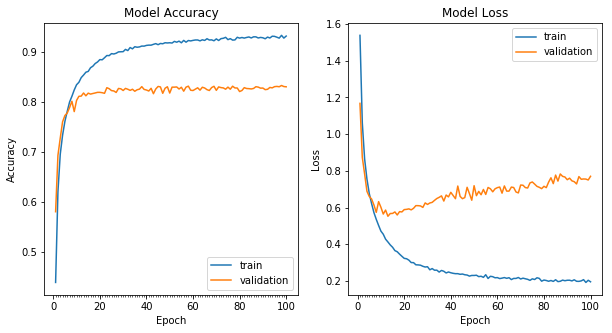

10000/10000 [==============================] - 1s 103us/step

Test result: 83.090 loss: 0.770


In [4]:
# plot model accuracy and model loss
plot_model_history(fit_history)

acc = model.evaluate(images_test, labels_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (acc[1]*100, acc[0]))